## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [160]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [161]:
df = pd.read_csv('ab_data.csv')
df.head(6)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0


b. Use the below cell to find the number of rows in the dataset.

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [163]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [164]:
df.query('converted == 1').user_id.nunique()/ df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [165]:
df.query('group != "treatment" and landing_page == "new_page"').user_id.nunique()

1928

In [166]:
df.query('group != "control" and landing_page == "old_page"').user_id.nunique()

1965

f. Do any of the rows have missing values?

In [167]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [168]:
df2 = df.drop(df[(df.landing_page == 'old_page') & (df.group != 'control')].index)
df2 = df2.drop(df[(df.landing_page == 'new_page') & (df.group != 'treatment')].index)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [169]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [170]:
df2.user_id.nunique()


290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [171]:
df2_duble = df2[df2['user_id'].duplicated()==True]
df2_duble

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [172]:
df2.query('user_id == "773192"')


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [175]:
df2[df2['user_id'] == 773192].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 2893 to 2893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       1 non-null      int64 
 1   timestamp     1 non-null      object
 2   group         1 non-null      object
 3   landing_page  1 non-null      object
 4   converted     1 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 48.0+ bytes


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [174]:
df2.drop([1899],axis=0,inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [176]:
len(df2.query('converted == 1'))/len(df2.index)


0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [177]:
len(df2.query('converted == 1 and group == "control"'))/len(df2.query('group == "control"'))

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [178]:
len(df2.query('converted == 1 and group == "treatment"'))/len(df2.query('group == "treatment"'))

0.11880806551510564

d. What is the probability that an individual received the new page?

In [179]:
len(df2.query('landing_page == "new_page"'))/len(df2.index)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer**

The observed statistics can be intepretated as follow:
* The conversion rate of the individuals in the control group is slightly higher than in the treatment group.
* With 50% proportion that an individual received the new page one can say that the data sample is fair designed and not biased into one specific direction

At this point the results don't give us enough eveidence to make a crystal clear statement regarding the question whether the new page leads to more conversion. The observed different in proportion can be due to chance.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

*Answer*

\begin{equation*}
H_0 = P_cn - P_co <= 0
\end{equation*}
\begin{equation*}
H_1 = P_cn - P_co  >  0
\end{equation*}


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [180]:
df_new_page = df2.query('group =="treatment"')
prob_new = len(df2.query('converted == 1'))/len(df2.index)
prob_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [181]:
df_old_page = df2.query('group =="control"')
prob_old = len(df2.query('converted == 1'))/len(df2.index)
prob_old

0.11959708724499628

c. What is $n_{new}$?
It's the number of individuals in the group of the treatment group

In [182]:
n_new = len(df2.query('group =="treatment"'))
n_new

145310

d. What is $n_{old}$?
It's the number of individuals in the group of the treatment group

In [183]:
n_old = len(df2.query('group =="control"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [184]:
new_page_converted=np.random.binomial(1,prob_new,n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [185]:
old_page_converted=np.random.binomial(1,prob_old,n_old)
old_page_converted

array([1, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [186]:
new_page_converted.mean()-old_page_converted.mean()

0.002152377637986147

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [187]:
# Apply the bootstrapping methodology to generate 10000 mean diffs and approaching the Central Limit Theorem for getting a nice gaussian distribution bell curve 
p_diffs=[]
for _ in range (10000):
    prob_new_sample = np.random.binomial(1, prob_new, n_new).mean()
    prob_old_sample = np.random.binomial(1, prob_old, n_old).mean()
    p_diffs.append(prob_new_sample - prob_old_sample)
    
p_diffs = np.asarray(p_diffs)
p_diffs

array([-0.00060078,  0.00118189,  0.0001701 , ..., -0.00173621,
        0.00010108, -0.00064925])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Plot preparation 
* Prepare the statistics diff value for the proportions of both converted groups, the tretment and the control groups
* Define the cnfidence ointerval for determin whether the observed p_diff value were genreating our statistic with evidence or not. 
* Use the matlotlib hist method to plot the results

In [188]:
# Determine the statistic numbers for both groups as reference
statistic_diff_mean = df2.query('group =="treatment"').converted.mean() - df2.query('group =="control"').converted.mean()
statistic_diff_mean

-0.0015782389853555567

In [189]:
# Define the confidence interval based pn the targeted Type I error rate of 5%
confidence_lower_boundary, confidence_upper_boundary = np.percentile(p_diffs, .5), np.percentile(p_diffs, 99.5)

No handles with labels found to put in legend.


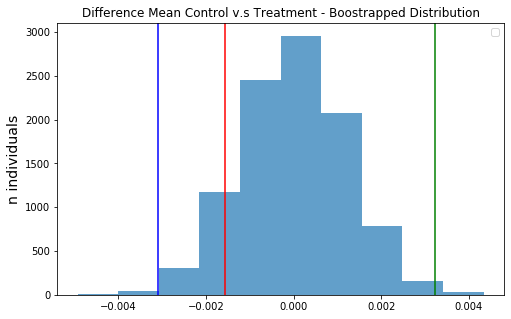

In [190]:
# Plot the distribution of the random generated diff means

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(p_diffs, alpha=0.7)
ax.axvline(statistic_diff_mean,color="red")
ax.axvline(confidence_lower_boundary,color="blue")
ax.axvline(confidence_upper_boundary,color="green")
ax.set_ylabel('n individuals',fontsize=14)
ax.set_title('Difference Mean Control v.s Treatment - Boostrapped Distribution')
ax.legend()
plt.show()


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [191]:
(p_diffs>statistic_diff_mean).mean()


0.9054

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

That's the probability of having a Type 1 error. That also mean it is the probability that we would go with the new page altought he old page is truly better.

It's called the p Value. The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

When the p-value is large, we have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null.

In our case the p-value is large 0.9022. We fail to reject the H0 and decide to continue with the the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [192]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and landing_page == "old_page"').shape[0]
convert_new = df2.query('converted == 1 and landing_page == "new_page"').shape[0]
n_old = df2.query('landing_page=="old_page"').shape[0]
n_new = df2.query('landing_page=="new_page"').shape[0]
print(convert_old,convert_new,n_old,n_new)


17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [193]:
p_diffs.mean(), p_diffs.std(), p_diffs.var()


(8.839843500408038e-06, 0.001203148320065335, 1.4475658800760377e-06)

In [194]:
# https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html 
stat, p_val = sm.stats.proportions_ztest([convert_old, convert_new
], [n_old, n_new], value=None, alternative='smaller', prop_var=False)
stat, p_val

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**

* p-value represents the probability that if we would rejected the null hypothesis. it would be wrong with this probabilty.
* The z stat value represents standard deviation and can be used as a further test to get to statistical significants regarding the decision whether we reject the H0 or not.

The z-score is small. P-value is high. Hence, converstion rate based on the old page is statistically better than from the new page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**
In our course we came acroos three regression approaches I want to list here


* Multiple Linear Regression: compare multiple explanatory variables to predict a response variable
* Linear Regression: Investigate the corelation of two quantitative variables - use one explanatory variable to predict a response variable

* Logistic Regression: predict categorical data output. Classify max 2 outcomes.

In our case we have two possible outcome. Therefore we use the Logistic Regression model.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [195]:
df2['intercept'] = 1
df2['ab_page'] = df2['landing_page'].apply(lambda x: 1 if x !='old_page' else 0)
df2 = df2.join(pd.get_dummies(df2['landing_page']))
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [196]:
log_reg_model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = log_reg_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [197]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 22 Apr 2020   Pseudo R-squ.:               8.077e-06
Time:                        07:45:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [1]:
 print(1 / np.exp(-1.9888))
 print(1 / np.exp(-0.0150))


NameError: name 'np' is not defined

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**

The p-value as output of the regression method discribes the elaborate variable has impact statistically significant influence on the response variable. A low p-value (< 0.05) indicates that you can reject the null hypothesis. A statistical significant influence is given if this value is below .05. For ab_page is 0.190 and so it is !=0 and especially <.05. That means there seems to be no direct link between the ab_page and the conversion. 

The different result in compare to Part II:

* In the A/B testing part, the null hypothesis states that the old page is better than, or equal to, the new page. It's a one-tailed test. A high p-value indicates that the obsevred statistic came from the null.
* In logistic regression: The smaller the p-value, this mean the more confident you are about the existence of relationship between the two variables. 

P-values have just another meaning as explained above between A/B testing and logistic regression outputs.

f. Now, you are considering other things that might influence whether or not an individual converts. Discuss why it is a good idea to consider other factors to add into your regression model. Are there any disadvantages to adding additional terms into your regression model?



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

Conversion scan be influenced by other factors. Factors like we discussed durign the course so called user change aversion,the page view duration, and the novelty effect. There are certainly more but in our context those might be the most interestign ones. 

Providing the full picture, running the regression model could calcuate a better outcome. In the same time more parameters mean more uncertainty about their relationship to one another. If they influence each other, we need to drop the one of the identified parameter. So, there is a risk to loose clarity. 


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [200]:
df_countries = pd.read_csv('countries.csv')
df2 = df2.join(df_countries.set_index('user_id'),on='user_id')

In [201]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,US


In [202]:
### Create the necessary dummy variables
df2=df2.join(pd.get_dummies(df2['country']))

In [203]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,US,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [206]:
### Fit Your Linear Model And Obtain the Results
## Intercept is already created in a cell above
lms2 = sm.Logit(df2['converted'],df2[['intercept','UK','CA']])
res2 = lms2.fit()
res2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 22 Apr 2020   Pseudo R-squ.:               1.521e-05
Time:                        08:23:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

In [209]:
# create a meaningful values out of the coef
# CA 
print(np.exp(-0.0408))
# UK
print(np.exp(0.0099))
# US
print(1/(np.exp(-1.9967)))


0.9600211149716509
1.0099491671175422
7.364712402994374


**Answer**

The p-values from UK as well as from CA are way bigger then .05 and so there is no stitiscally significance hooked to the user's country.

In [210]:
# To represent the interaction between page and country we gonna multiply those two variables and store the results in three new dummy columns.
df2['new_uk'] = df2['new_page']*df2['UK']
df2['new_ca'] = df2['new_page']*df2['CA']
df2['new_us'] = df2['new_page']*df2['US']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page,country,CA,UK,US,new_uk,new_ca,new_us
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0,US,0,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,US,0,0,1,0,0,0


In [211]:
# Use the statsmodel logistic regressionmodel and put the US as intercept
lms3=sm.Logit(df2['converted'],df2[['intercept','new_uk','new_ca']])
res3=lms3.fit()
res3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 22 Apr 2020   Pseudo R-squ.:               2.364e-05
Time:                        08:38:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9963      0.006   -322.049      0.000      -2.008      -1.984
new_uk         0.0149      0.017      0.862      0.389      -0.019       0.049
new_ca        -0.0752      0.038     -1.997      0.046      -0.149      -0.001
==============================================================================
"""

In [212]:

# Create meanignful numbers out of the coeffs 
# US
print(1/np.exp(-1.9963))
# UK
print(1/np.exp(0.0149))
# CA
print(1/np.exp(-0.0752))


7.3617671071316195
0.9852104557227469
1.0780997492739288


**Answer**
For users from different countries that received the new landing page, the conversion compared to that of US can be intepretated like this:

* conversion with new page  is 0.9852 times as likely in UK compared to the US
* conversion with new page is 1.0781 times less likely in CA compared to the US.

This result somehow backs up the results when we asked for the genereic influence of country, since we can't see significant differences in conversions with the new page either. 


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.